# Project 4
### Gruop member: Zhijing Zhang, Gege Li

In [1]:
# load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Phase I:Data Acquisition, Data Preparation & Exploratory Data Analysis

#### Data Acquisition and Data Preparation

- Read the mushroom dataset from the original data source and change into a pandas data frame
- Create a subset of the data frame which includes column indicating whether mushroom is edible or poisonous, column for odor, and at least two other columns of our choice
- Add meaningful names to the columns.
- Determine if there are null values and also whether the columns contain other values not described on the data dictionary
- Replace column values to also have meaningful names 

In [15]:
#read the csv file
mr_df = pd.read_csv("https://raw.githubusercontent.com/gegeli638/DAV-5400/master/agaricus-lepiota.data", header = None)


# create a subset of 4 columns, including 'edible' + 'poisonous'
# use the 'copy()' function to preserve the original data frame
mr_sub = mr_df.iloc[:, [0, 3, 5, 22]].copy()

# check results:  we have the 4 columns we want, Check the first 10 rows
mr_sub.head(10)

,0,3,5,22
0,p,n,p,u
1,e,y,a,g
2,e,w,l,m
3,p,w,p,u
4,e,g,n,g
5,e,y,a,g
6,e,w,a,m
7,e,w,l,m
8,p,w,p,g
9,e,y,a,m


In [16]:
# Add meaningful names for each column in the DataFrame you created to store your subset.
mr_sub.columns = ['Edible', 'Cap_Color', 'Odor', 'Habitat']

# sanity check
#mr_sub.head(10)

# replace Edible col values
mr_sub.Edible.replace('e', 'edible', inplace = True)
mr_sub.Edible.replace('p', 'poisonous', inplace = True)

# replace Cap Color values using a dict
mr_sub.Cap_Color.replace({'n': 'brown', 
                             'b': 'buff',
                             'c': 'cinnamon',
                             'g': 'gray',
                             'r': 'green',
                             'p': 'pink',
                             'u': 'purple',
                             'e': 'red',
                             'w': 'white',
                             'y': 'yellow'}, inplace = True)

# replace Odor values using a dict
mr_sub.Odor.replace({'a': 'almond', 
                             'l': 'anise',
                             'c': 'creosote',
                             'y': 'fishy',
                             'f': 'foul',
                             'm': 'musty',
                             'n': 'none',
                             'p': 'pungent',
                             's': 'spicy'}, inplace = True)

# replace Habitat values using a dict
mr_sub.Habitat.replace({'g': 'grasses', 
                             'l': 'leaves',
                             'm': 'meadows',
                             'p': 'paths',
                             'u': 'urban',
                             'w': 'waste',
                             'd': 'woods'}, inplace = True)


#show the result of the new dataframe
mr_sub.head(10)

,Edible,Cap_Color,Odor,Habitat
0,poisonous,brown,pungent,urban
1,edible,yellow,almond,grasses
2,edible,white,anise,meadows
3,poisonous,white,pungent,urban
4,edible,gray,none,grasses
5,edible,yellow,almond,grasses
6,edible,white,almond,meadows
7,edible,white,anise,meadows
8,poisonous,white,pungent,grasses
9,edible,yellow,almond,meadows


#### Perform exploratory data analysis:  

- Show the distribution of data for each of the columns：Edible, Odor, Cap_Color, Habitat.
- Show edible and poisonous mushroom in different cap color, odor and habitat.
- Analyze whether the predictor variables identified are helpful in determining whether a mushroom is edible or not using visualizations


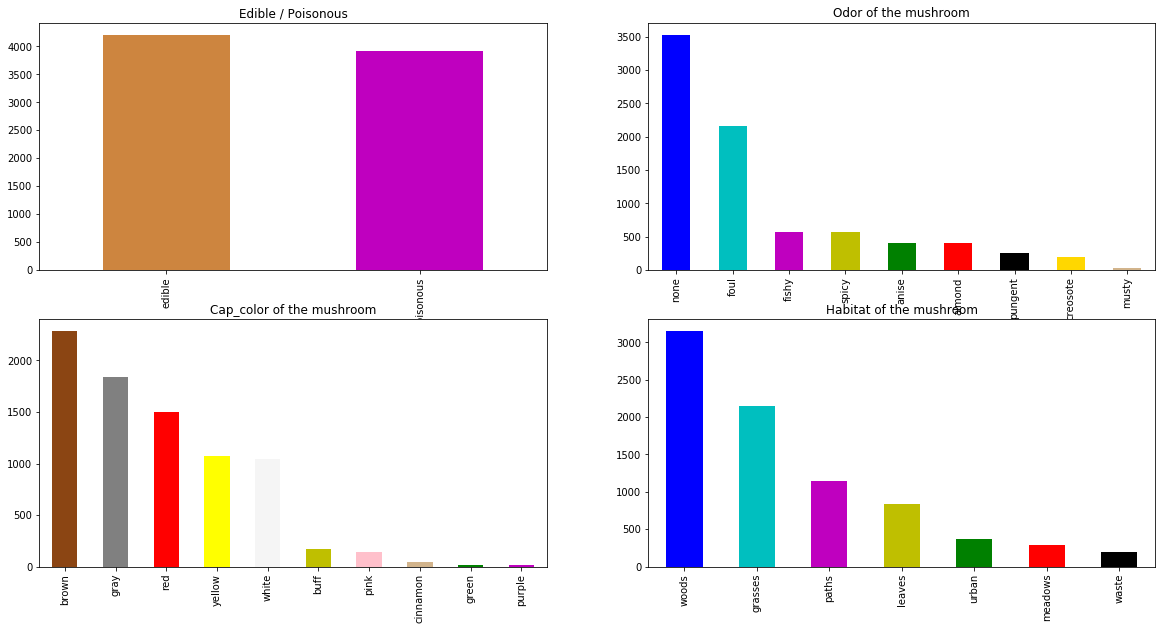

In [22]:
# define a new figure for plotting
plt.figure()

# create a bar plot of the Edible variable's value counts
#put it in a correct position
plt.subplot(221)
#give this plot correct color and size
plt1 = mr_sub['Edible'].value_counts().plot.bar(color=['peru', 'm'], figsize=(20,10))
#put a title of the column
plt.title('Edible / Poisonous')

# create a bar plot of the Odor variable's value counts
#put it in a correct position
plt.subplot(222)

#give this plot correct color and size
plt2 = mr_sub['Odor'].value_counts().plot.bar(color=['b','c','m','y','g','r','k','gold','tan'], figsize=(20,10))

#put a title of the column
plt.title('Odor of the mushroom')

# create a bar plot of the Cap_Color variable's value counts
#put it in a correct position
plt.subplot(223)

#give this plot correct color and size
plt3 = mr_sub['Cap_Color'].value_counts().plot.bar(color=['saddlebrown','grey','r','yellow','whitesmoke','y','pink','tan','g','m'], figsize=(20,10))

#put a title of the column
plt.title('Cap_color of the mushroom')

# create a bar plot of the Habitat variable's value counts
#put it in a correct position
plt.subplot(224)

#give this plot correct color and size
plt4 = mr_sub['Habitat'].value_counts().plot.bar(color=['b','c','m','y','g','r','k'], figsize=(20,10))

#put a title of the column
plt.title('Habitat of the mushroom')

#show the plt
plt.show()

This four plots shows:
- In the Edible / Poisonous plot, the number of edible mushroom and poisonous mushroom are similar. But edible mushroom is a little bit more than poisonous mushroom.
- In the odor of the mushroom plot, none odor mushroom are the most. Followed by the foul odor mushroom. Then fishy odor,spicy odor, anise odor, pungent odor and creosote odor. The least odor mushroom are musty odor.
- In the cap color of the mushroom plot, the most one is brown mushroom, then gray one, then red and yellow. Followed by white, buff, pink. Cinnanom, green and purple mushroom are rarely.
- In the habitat of the mushroom plot, woods are the most. Then grasses, paths,leves and urban. Followed by the meadows and waste. That means mushroom prefer wood and grasses area.

#### Then draw plots to show edible and poisonous mushroom in different cap color, odor and habitat.
##### a. edible and poisonous mushroom in different cap color

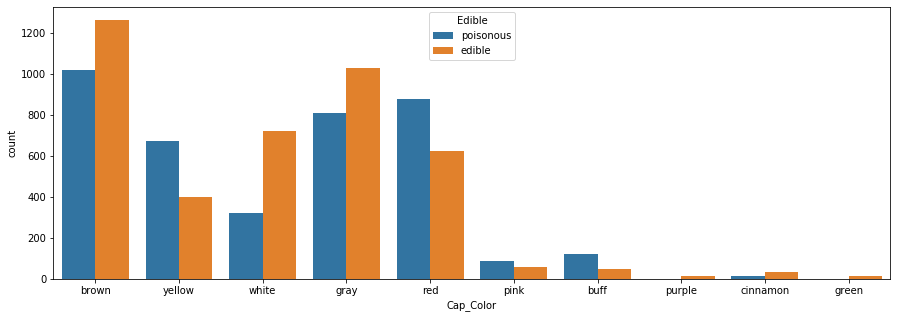

In [3]:
#figure the plot sizse
plt.figure(figsize=(15,5))
#draw a countplot to show the 'cap_color' and 'edible'
sns.countplot(x='Cap_Color',hue='Edible', data=mr_sub)

- In this plot, edible mushroom in brown, white, gray, purple, cinnamon and green are more than poisonous mushiroom. Yellow, red, pink and buff poisonous mushroom are more than edible mushroom. 
- From this plot we can get preliminary conclusions that some mushroom in bright color are ofen be poisonous.

##### b. edible and poisonous mushroom in different odor

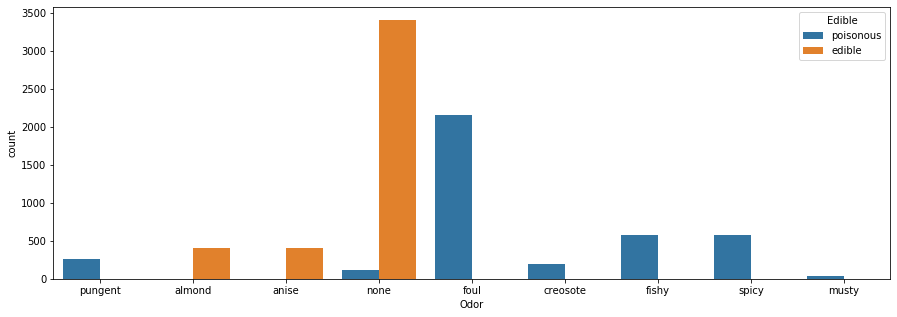

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(x='Odor',hue='Edible', data=mr_sub)

- In this plot, only the mushroom in alond, anise and none odor can be eaten(is the edible). All other odors mushroom are poisonous. And some of none odor mushroom also poisonous but very less.
- From this plot we can get the preliminary conclusions that only the mushroom in normal are edible and stange odor mushroom often be poisonous.

##### c.edible and poisonous mushroom in different habitat

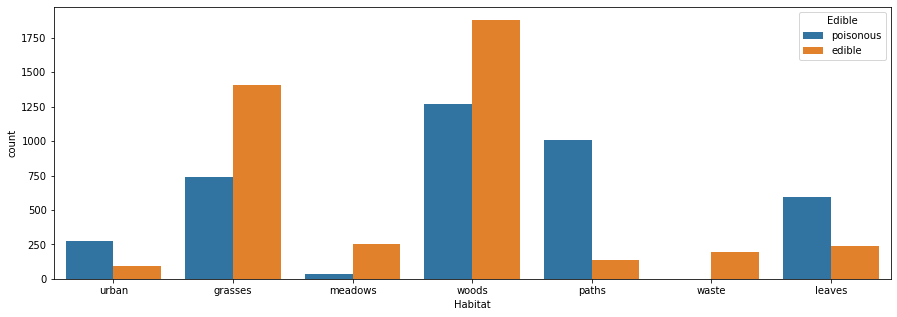

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x='Habitat',hue='Edible', data=mr_sub)

- In this plot, mushroom habitat in grasses, meadows, woods and waste are more likely to be edible than poisonous. Mushroom habitat in urban, paths and leaves are more likely to be poisonous than edible.
- From this plot we can get the preliminary conclusions that edible mushroom need to grow in fresh air habitat.

### Convert the “e”/”p” indicators in the first column to digits:

In [7]:
# Convert the “e”/”p” indicators in the first column to digits:
#creates copy of the original data subset
mr_sub2 = mr_sub.copy()
mr_sub2.head()

# replace Edible column values
# Edible only has two values
# replace e with 0, p with 1
mr_sub2.Edible.replace('edible', 0, inplace = True)
mr_sub2.Edible.replace('poisonous', 1, inplace = True)
mr_sub2

# create a new "0/1" binary indicator variable for each categorical data value
mr_dum = pd.get_dummies(mr_sub2)
mr_dum.head(10)

,Edible,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,Cap_Color_gray,Cap_Color_green,Cap_Color_pink,Cap_Color_purple,Cap_Color_red,Cap_Color_white,...,Odor_none,Odor_pungent,Odor_spicy,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Phase II: Build Predictive Models
### Logistic Regression Modelling:

In [27]:
#Check to see if any null value existed
mr_dum.isnull().sum()

Edible                0
Cap_Color_brown       0
Cap_Color_buff        0
Cap_Color_cinnamon    0
Cap_Color_gray        0
Cap_Color_green       0
Cap_Color_pink        0
Cap_Color_purple      0
Cap_Color_red         0
Cap_Color_white       0
Cap_Color_yellow      0
Odor_almond           0
Odor_anise            0
Odor_creosote         0
Odor_fishy            0
Odor_foul             0
Odor_musty            0
Odor_none             0
Odor_pungent          0
Odor_spicy            0
Habitat_grasses       0
Habitat_leaves        0
Habitat_meadows       0
Habitat_paths         0
Habitat_urban         0
Habitat_waste         0
Habitat_woods         0
dtype: int64

### Model 1: Odor Only

In [8]:
# first choose the odor to do the predict with the edible
# create dataframes with an intercept column
# grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
y_odor, X_odor = dmatrices('Edible ~ Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty\
                            +  Odor_none +  Odor_pungent +  Odor_spicy',mr_dum, return_type="dataframe")
print (X_odor.columns)

# flatten y into a 1-D array
y_odor = np.ravel(y_odor)

# instantiate a logistic regression model, and fit with X and y
model_odor = LogisticRegression()
model_odor = model_odor.fit(X_odor, y_odor)

# check the accuracy on the training set
model_odor.score(X_odor, y_odor)

Index(['Intercept', 'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy',
       'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy'],
      dtype='object')


0.9852289512555391

#### Result: 
- The result shows that just using the odor column as predictor variable can actually yield a good model that is 98.522% accurate.

### Model 2: Odor and Cap Color

In [9]:
#see the effect of adding the Cap Color in the logistic regression model
# create dataframes with an intercept column
# we will be able to find out if it will increase, decrease, or will have no effect on the accuracy of the model.
y_occ, X_occ = dmatrices('Edible ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray \
                          + Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white \
                          + Cap_Color_yellow + Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul \
                          + Odor_musty +  Odor_none +  Odor_pungent +  Odor_spicy',mr_dum, return_type="dataframe")
print (X_occ.columns)

# flatten y into a 1-D array
y_occ = np.ravel(y_occ)

# instantiate a logistic regression model, and fit with X and y
model_occ = LogisticRegression()
model_occ = model_occ.fit(X_occ, y_occ)

# check the accuracy on the training set
model_occ.score(X_occ, y_occ)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Odor_almond', 'Odor_anise', 'Odor_creosote',
       'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent',
       'Odor_spicy'],
      dtype='object')


0.9852289512555391

#### Result: 
- The result above 98.522% shows that adding cap color to the original model does not increase or decrease the accuracy of the original model. 
- This just shows that adding adding cap color alone will not improve the model to predict whether a mushroom is edible or not.

### Model 3: Odor and Habitat

In [17]:
# create dataframes with an intercept column
y_oh, X_oh = dmatrices('Edible ~ Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty\
                            +  Odor_none +  Odor_pungent +  Odor_spicy +  Habitat_grasses + Habitat_leaves\
                            + Habitat_meadows + Habitat_paths + Habitat_urban + Habitat_waste + + Habitat_woods',mr_dum, return_type="dataframe")
print (X_odor.columns)

# flatten y into a 1-D array
y_oh = np.ravel(y_oh)

# instantiate a logistic regression model, and fit with X and y
model_oh = LogisticRegression()
model_oh = model_oh.fit(X_oh, y_oh)

# check the accuracy on the training set
model_oh.score(X_oh, y_oh)

Index(['Intercept', 'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy',
       'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy'],
      dtype='object')


0.9896602658788775

#### Result: 
- The result above 98.966% shows that adding Habitat to the original model (odor only) increase the accuracy of the model. 
- This shows that adding Habitat alone will improve the model to predict whether a mushroom is edible or not.

### Model 4: Cap color and Habitat

In [11]:
# create dataframes with an intercept column
y_ch, X_ch = dmatrices('Edible ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray + Cap_Color_green \
                  + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow + Habitat_grasses + Habitat_leaves\
                            + Habitat_meadows + Habitat_paths + Habitat_urban + Habitat_waste + + Habitat_woods',mr_dum, return_type="dataframe")
print (X_ch.columns)

# flatten y into a 1-D array
y_ch = np.ravel(y_ch)

# instantiate a logistic regression model, and fit with X and y
model_ch = LogisticRegression()
model_ch = model_ch.fit(X_ch, y_ch)

# check the accuracy on the training set
model_ch.score(X_ch, y_ch)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Habitat_grasses', 'Habitat_leaves',
       'Habitat_meadows', 'Habitat_paths', 'Habitat_urban', 'Habitat_waste',
       'Habitat_woods'],
      dtype='object')


0.740521910388971

#### Result: 
- The result above 74% shows that removing odor in the model and just using the combination of cap color and Habitat will decrease the accuracy of the model by approximately 25%. 
- This shows that odor is the most important predictor of whether a mushroom is edible or not.

### Model 5: Odor, Cap color and Habitat

In [12]:
# create dataframes with an intercept column
y, X = dmatrices('Edible ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray + Cap_Color_green \
                  + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow + Odor_almond \
                  +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty +  Odor_none +  Odor_pungent \
                  +  Odor_spicy +  Habitat_grasses + Habitat_leaves + Habitat_meadows + Habitat_paths\
                  + Habitat_urban + Habitat_waste + + Habitat_woods',mr_dum, return_type="dataframe")
print (X.columns)

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Odor_almond', 'Odor_anise', 'Odor_creosote',
       'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent',
       'Odor_spicy', 'Habitat_grasses', 'Habitat_leaves', 'Habitat_meadows',
       'Habitat_paths', 'Habitat_urban', 'Habitat_waste', 'Habitat_woods'],
      dtype='object')


0.9896602658788775

#### Result: The model we have generated has an accuracy score of 98.966%. 
- It appears that the combination of the three predictors we have chosen has the same effect with the combination of Odor and Habitat.
- As such, we recommend the use of this model or just Oder and Habitat to analyze the coefficients and will also further evaluate this model as shown in the next steps.

In [13]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[0.8939284909545963]
1,Cap_Color_brown,[-1.4922300365349197]
2,Cap_Color_buff,[3.7252378355504168]
3,Cap_Color_cinnamon,[-1.1213707317687645]
4,Cap_Color_gray,[-2.142431057910132]
5,Cap_Color_green,[-0.7285476782870232]
6,Cap_Color_pink,[3.0890110160869013]
7,Cap_Color_purple,[-0.7285476782870232]
8,Cap_Color_red,[-1.9008444400670934]
9,Cap_Color_white,[0.4541475726208132]


### Model Evaluation Using a Validation Set

In [14]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

# Result: The accuracy is 99%, which is the same as we experienced when training and predicting on the same data.

# Generating the confusion matrix and classification report with other metrics:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))


[1. 0. 0. ... 1. 1. 1.]
[[0.01962998 0.98037002]
 [0.98581711 0.01418289]
 [0.92485083 0.07514917]
 ...
 [0.00165665 0.99834335]
 [0.01473746 0.98526254]
 [0.01145518 0.98854482]]
0.9901558654634947
0.9987873798504806
[[1269    3]
 [  21 1145]]
             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1272
        1.0       1.00      0.98      0.99      1166

avg / total       0.99      0.99      0.99      2438



#### Result: 
- Based on the statistics we generated above, the weighted average of the precision and recall is 99% 
- which means our result showed F1 score almost reaches its best value at 1 
- it's a very strong valuable model

### Conclusion:

According to the results, we conclude that odor is the best predictor of whether mushrooms are edible. Odor can create a logistic regression model with an accuracy of 98.52%. And adding the Habitat will increase accuracy by about 0.466%, which is almost irrelevant. While adding the cap_color is the same with odor alone. 
So if you want to make scientific predictions, you can choose to use 3 variables (odor, cap color and habitat) or just odor and habitat to predict whether the mushroom is edible or not.